In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle5 as pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import random

In [2]:
# Task 2.2.1 - How to Re-sample the Data
train_sets_X = []
train_sets_Y = []
my_data = []
with open('../data/train.pkl', 'rb') as f:
    data = pickle.load(f)
    np.random.shuffle(data)
    my_data = data
    # divide data into 16 sets
    for i in range(16):
        my_arr = data[i*50:(i+1)*50]
        my_arr = my_arr[my_arr[:,0].argsort()]
        train_sets_X.append(my_arr[:,0])
        train_sets_Y.append(my_arr[:,1])

train_sets_X = np.array(train_sets_X)
    

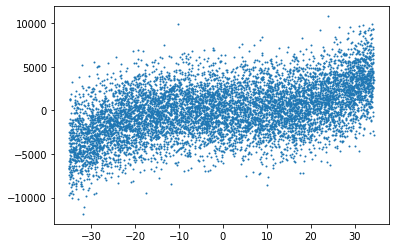

In [3]:
# plt.figure(figsize=(10,10))
# for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.scatter(train_sets_X[i], train_sets_Y[i], s=1)
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.title('Set {}'.format(i+1))

plt.scatter(my_data[:,0], my_data[:,1], s=1)

In [4]:
poly = PolynomialFeatures(degree=2, include_bias=False)
train_sets_X_poly = []
for row in train_sets_X:
    row = row.reshape(-1,1)
    new_row = poly.fit_transform(row)
    train_sets_X_poly.append(new_row)
    # print(new_row.shape)
x_poly = poly.fit_transform(train_sets_X[0].reshape(-1,1))
train_sets_X_poly = np.array(train_sets_X_poly)
train_sets_X_poly.shape

(16, 50, 2)

In [5]:
reg = LinearRegression()
# sort train_sets_X_poly[0]
# my_arr = train_sets_X_poly[0]
# my_arr = my_arr[my_arr[:,0].argsort()]
y_predicted = []
for i in range(len(train_sets_X_poly)):
    reg.fit(train_sets_X_poly[i], train_sets_Y[i])
    y_predicted.append(reg.predict(train_sets_X_poly[i]))
# reg.fit(train_sets_X_poly[0], train_sets_Y[0])
# print(reg.coef_, reg.intercept_)

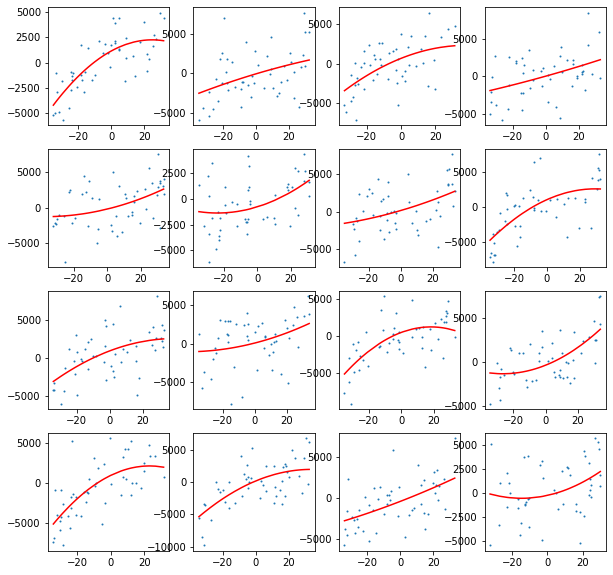

In [6]:
# y_predicted = reg.predict(train_sets_X_poly[0])
# plt.scatter(train_sets_X[0], train_sets_Y[0], s=1)
# plt.plot(train_sets_X[0], y_predicted, color='red')

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.scatter(train_sets_X[i], train_sets_Y[i], s=1)
    plt.plot(train_sets_X[i], y_predicted[i], color='red')
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.title('Set {}'.format(i+1))

In [7]:
def regression(x, y, degree):
    # PolynomialFeatures part
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    train_sets_X_poly = []
    for row in x:
        row = row.reshape(-1,1)
        new_row = poly.fit_transform(row)
        train_sets_X_poly.append(new_row)
    train_sets_X_poly = np.array(train_sets_X_poly)

    # LinearRegression part
    reg = LinearRegression()
    y_predicted = []
    for i in range(len(train_sets_X_poly)):
        reg.fit(train_sets_X_poly[i], y[i])
        y_predicted.append(reg.predict(train_sets_X_poly[i]))
        
    return y_predicted

In [8]:
new_y = regression(train_sets_X, train_sets_Y, 2)

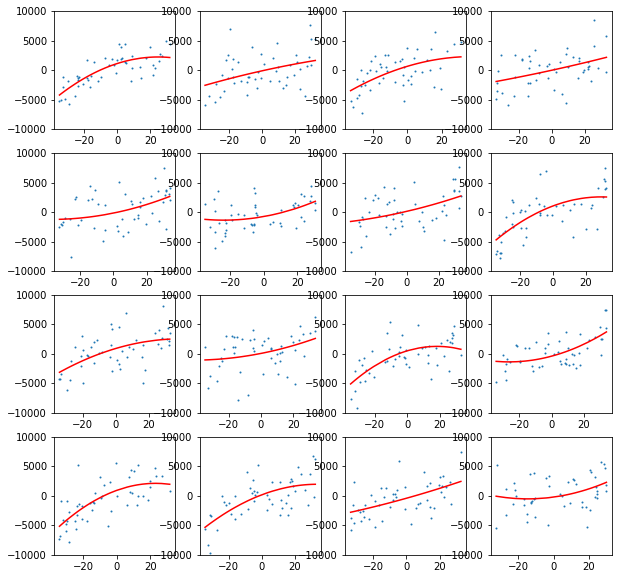

In [10]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.scatter(train_sets_X[i], train_sets_Y[i], s=1)
    plt.ylim(-10000, 10000)
    plt.plot(train_sets_X[i], new_y[i], color='red')